In [1]:
# coding=utf-8
from matplotlib import pyplot as plt
import cv2
import numpy as np
import dlib
import time
import math
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy.optimize import *

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
POINTS_NUM_LANDMARK = 68

## 1.dlib提取2D图片4个特征点

In [3]:
# 获取最大的人脸(get_landmark4函数内调用)
def largest_face(faces):
    '''
    求最大的人脸
    :param faces:detectors检测到的多个人脸的array
    :return:最大人脸的index
    '''
    if len(faces) == 1:
        return 0
    face_areas = [(face.right() - face.left()) * (face.bottom() - face.top()) for face in faces]  # 求脸的大小
    largest_area = face_areas[0]
    largest_index = 0
    for index in range(1, len(faces)):  # 取最大的脸
        if face_areas[index] > largest_area:
            largest_index = index
            largest_area = face_areas[index]
    print("largest_face index is {} in {} faces".format(largest_index, len(faces)))
    return largest_index

In [4]:
# 选取dlib检测的68点中的4个特征点
def get_points_2D(img):
    '''
    用dlib获取人脸4个特征点
    :param img: 输入图片
    :return: 人脸4特征点的矩阵shape=(4,2)，若未检测到人脸，返回None
    '''
    faces = detector(img, 0)  # 检测图片中的所有人脸,网上都是1，cvdlib中是0
    if len(faces) == 0:  # 没有检测到人脸
        print("ERROR: found no face")
        return None
    largest_index = largest_face(faces)  # 取最大人脸
    face_rectangle = faces[largest_index]  # 取对应人脸框
    landmark68 = predictor(img, face_rectangle)  # dlib检测人脸特征68点
    points_2D = np.array([  # 取出68点中所需的7个点
        (landmark68.part(36).x, landmark68.part(36).y),  # 左眼左眼角
        (landmark68.part(45).x, landmark68.part(45).y),  # 右眼右眼角
        (landmark68.part(30).x, landmark68.part(30).y),  # 鼻尖
        (landmark68.part(8).x, landmark68.part(8).y)  # 下巴
    ], dtype="double")
    return points_2D

In [5]:
# 注释4个标记点
def annotate_points(img,point_2D):
    '''
    注释4个标记点
    :param im: 输入图片,4个标记点
    :return: 带有4个标记点的图片
    '''
    img_with_points = img.copy()
    for point in point_2D:
        point = (int(point[0]), int(point[1]))
        cv2.circle(img_with_points, point, 3, color=(255, 255, 255))
    return img_with_points

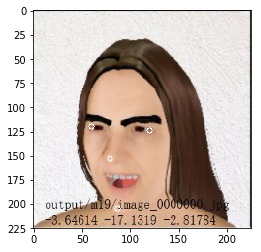

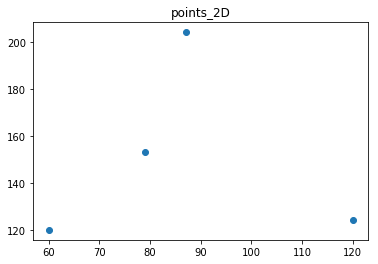

In [6]:
#-------------test--------------------------------------------------
#读取图像
img0 = cv2.imread('19.jpg')
img0=cv2.resize(img0,(225,225))
img = img0[:,:,::-1] # 调节色彩通道
points_2D=get_points_2D(img)
img_with_points=annotate_points(img,points_2D)
plt.imshow(img_with_points)
plt.show()
plt.scatter(points_2D.T[0],points_2D.T[1])
plt.title('points_2D')
plt.show()

## 2.手动构建4点人脸3D模型

In [7]:
# 手动构建4点人脸3D模型
def model_3D0():
    '''
    手动构建4点人脸3D模型，以鼻尖为坐标原点
    :return: 3D模型4点矩阵 shape=(4,3)
    '''
    points_3D = np.array([
        (-225.0, -170.0, -135.0),  # 左眼左眼角
        (225.0, -170.0, -135.0),  # 右眼右眼角
        (0.0, 0.0, 0.0),  # 鼻尖
        (0.0, 330.0, -135.0)  #下巴
    ])
    return points_3D

In [8]:
# 手动构建4点人脸3D模型
def model_3D1():
    '''
    手动构建4点人脸3D模型，以鼻尖为坐标原点
    :return: 3D模型4点矩阵 shape=(4,3)
    '''
    points_3D = np.array([
        (-225.0, -170.0, 0.0),  # 左眼左眼角
        (225.0, -170.0, 0.0),  # 右眼右眼角
        (0.0, 0.0, 105.0),  # 鼻尖
        (0.0, 170.0, 50.0)  #下巴
    ])
    return points_3D

In [9]:
# 手动构建4点人脸3D模型
def model_3D2():
    '''
    手动构建4点人脸3D模型，以鼻尖为坐标原点
    :return: 3D模型4点矩阵 shape=(4,3)
    '''
    points_3D = np.array([
        (-225.0, -170.0, -135.0),  # 左眼左眼角
        (225.0, -170.0, -135.0),  # 右眼右眼角
        (0.0, 0.0, 0.0),  # 鼻尖
        (0.0, 330.0, -60.0)  #下巴(0.0, 330.0, 50.0)
    ])
    return points_3D

In [10]:
# 手动构建4点人脸3D模型
def model_3D():
    '''
    手动构建4点人脸3D模型，以鼻尖为坐标原点
    :return: 3D模型4点矩阵 shape=(4,3)
    '''
    points_3D = np.array([
        (-225.0, -170.0, -135.0),  # 左眼左眼角
        (225.0, -170.0, -135.0),  # 右眼右眼角
        (0.0, 0.0, 0.0),  # 鼻尖
        (0.0, 330.0, -135.0)  #下巴
    ])
    return points_3D

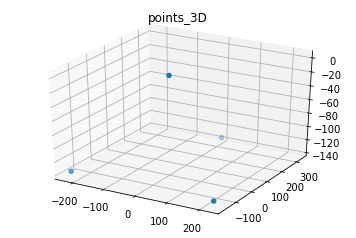

In [11]:
#---------------------------test------------------------------------
points_3D=model_3D()
#print(points_3D)
ax = plt.subplot(111, projection='3d')
ax.scatter(points_3D.T[0],points_3D.T[1],points_3D.T[2])
plt.title('points_3D')
plt.show()

## 3.归一化

In [12]:
# 归一化点
def get_normalize(points):
    '''
    归一化点
    :param 手动构建的3D模型(points_3D) 或 dlib检测到的4个特征点(points_2D)
    :return: 归一化后的点矩阵
    '''
    center = np.sum(points, axis=0) / points.shape[0]  # 中心
    L = np.sum(np.sum((points - center) ** 2, axis=1) ** 0.5)  # 归一化系数
    normalize = (points - center) / L
    return normalize, center, L

[[-225. -170. -135.]
 [ 225. -170. -135.]
 [   0.    0.    0.]
 [   0.  330. -135.]]
normalize_3D=
 [[-0.22487876 -0.16740975 -0.03373181]
 [ 0.22487876 -0.16740975 -0.03373181]
 [ 0.          0.00249865  0.10119544]
 [ 0.          0.33232084 -0.03373181]]
normalize_2D=
 [[-0.18337078 -0.20931947]
 [ 0.23180834 -0.18164086]
 [-0.05189739  0.01902904]
 [ 0.00345983  0.37193129]]


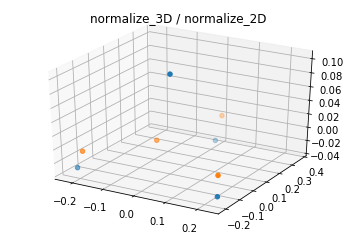

In [13]:
#------------------------------test---------------------------------
normalize_3D,center_3D, L_3D=get_normalize(points_3D)
normalize_2D,center_2D, L_2D=get_normalize(points_2D)
print(points_3D)
print('normalize_3D=\n',normalize_3D)
print('normalize_2D=\n',normalize_2D)
bx = plt.subplot(111, projection='3d')
bx.scatter(normalize_3D.T[0],normalize_3D.T[1],normalize_3D.T[2])
bx.scatter(normalize_2D.T[0],normalize_2D.T[1])
plt.title('normalize_3D / normalize_2D')
plt.show()

## 4.求投影矩阵P

In [14]:
# 求投影矩阵P
def get_P_matrix(normalize_3D, normalize_2D):
    num = normalize_2D.shape[0]
    _ = 0  # _是要舍弃的值
    if num < 3:
        return -1
    elif num == 3:
        _, r1_T = cv2.solve(normalize_3D.T, normalize_2D.T[0], _)
        _, r2_T = cv2.solve(normalize_3D.T,normalize_2D.T[1], _)
    else:
        _, r1_T = cv2.solve(normalize_3D, normalize_2D.T[0], _, cv2.DECOMP_SVD)  # 奇异值分解
        _, r2_T = cv2.solve(normalize_3D, normalize_2D.T[1], _, cv2.DECOMP_SVD)
    r1 = r1_T.T[0]
    r2 = r2_T.T[0]
    r3 = np.cross(r1, r2)
    P = np.array([r1, r2])
    return P

In [15]:
#------------------------------test---------------------------------
P=get_P_matrix(normalize_3D,normalize_2D)
print('P=\n',P)

P=
 [[ 0.92311766 -0.04154029 -0.51181746]
 [ 0.06154118  1.13543473  0.16000706]]


## 5.优化Delta

### 直角坐标系 → 球坐标系

In [16]:
def get_ball_center(normalize_3D):
    '''
    由4个点的坐标在球面上的关系式可转换成线性方程组的求解
    （x-xi)^2+(y-yi)^2+(z-zi)^2=r^2,最终可转化成AX=b的求解，A为3*3,b为3*1
    '''
    _=0
    if normalize_3D.shape[0]!=4:
        return -1
    A=np.array([(normalize_3D[0]-normalize_3D[1]),(normalize_3D[3]-normalize_3D[3]),(normalize_3D[1]-normalize_3D[2])])
    tmp=np.array([np.sum(normalize_3D[0]**2),np.sum(normalize_3D[1]**2),np.sum(normalize_3D[2]**2),np.sum(normalize_3D[3]**2)])
    b=1/2*np.array([(tmp[0]-tmp[1]),(tmp[2]-tmp[3]),(tmp[1]-tmp[2])])
    _, ball_center = cv2.solve(A, b, _, cv2.DECOMP_SVD)  # 奇异值分解
    return ball_center

ball_center= [[  1.38777878e-17]
 [ -1.25403215e-01]
 [ -9.95849057e-02]]


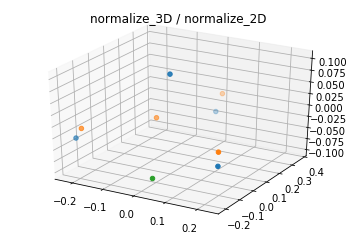

In [17]:
#------------------------------test---------------------------------
ball_center=get_ball_center(normalize_3D)
print('ball_center=',ball_center)
bx = plt.subplot(111, projection='3d')
bx.scatter(normalize_3D.T[0],normalize_3D.T[1],normalize_3D.T[2])
bx.scatter(normalize_2D.T[0],normalize_2D.T[1])
plt.title('normalize_3D / normalize_2D')
bx.scatter(ball_center[0],ball_center[1],ball_center[2])
plt.show()

In [18]:
def xyz_to_ball(normalize_3D):
    ball_center=get_ball_center(normalize_3D)
    normalize_3D_ball=np.zeros(normalize_3D.shape)
    
    for i in range(normalize_3D.shape[0]):
        x=normalize_3D[i][0]-ball_center[0][0]#-normalize_3D[2][0]
        y=normalize_3D[i][1]-ball_center[1][0]#-normalize_3D[2][1]
        z=normalize_3D[i][2]-ball_center[2][0]#-normalize_3D[2][2]
        
        r=(x**2+y**2+z**2)**0.5
        
        if x==0 :
            if y==0:
                theta=0
            else:
                theta=math.pi/2
        elif x<0 :#为了能表示出二三象限的角度
            theta=math.atan(y/x)+math.pi
        else:
            theta=math.atan(y/x)
        
        if r==0:
            fai=0
        else:
            fai=math.acos(z/r)
        normalize_3D_ball[i]=np.array([r,theta,fai])
    return normalize_3D_ball

In [19]:
#××××××××××××××××××××××××××××××××××× 
'''
def ball_to_xyz(normalize_3D_ball_delta):#测试用 稍后删
    normalize_3D_xyz_delta=np.zeros(normalize_3D_ball_delta.shape)
    for i in range(normalize_3D_ball_delta.shape[0]):
        r=normalize_3D_ball_delta[i][0]
        theta=normalize_3D_ball_delta[i][1]
        fai=normalize_3D_ball_delta[i][2]
        x=r*math.sin(fai)*math.cos(theta)+ball_center[0][0]
        y=r*math.sin(fai)*math.sin(theta)+ball_center[1][0]
        z=r*math.cos(fai)+ball_center[2]
        normalize_3D_xyz_delta[i]=np.array([x,y,z])
    return normalize_3D_xyz_delta'''

'\ndef ball_to_xyz(normalize_3D_ball_delta):#测试用 稍后删\n    normalize_3D_xyz_delta=np.zeros(normalize_3D_ball_delta.shape)\n    for i in range(normalize_3D_ball_delta.shape[0]):\n        r=normalize_3D_ball_delta[i][0]\n        theta=normalize_3D_ball_delta[i][1]\n        fai=normalize_3D_ball_delta[i][2]\n        x=r*math.sin(fai)*math.cos(theta)+ball_center[0][0]\n        y=r*math.sin(fai)*math.sin(theta)+ball_center[1][0]\n        z=r*math.cos(fai)+ball_center[2]\n        normalize_3D_xyz_delta[i]=np.array([x,y,z])\n    return normalize_3D_xyz_delta'

In [20]:
#normalize_3D1=np.array([[-0.2,-0.1,-0.1],[4,5,6],[7,8,9]])
normalize_3D_ball=xyz_to_ball(normalize_3D)
normalize_3D_xyz=ball_to_xyz(normalize_3D_ball)
print(normalize_3D)
print(normalize_3D_ball)
print(normalize_3D_xyz)

NameError: name 'ball_to_xyz' is not defined

In [21]:
# 变形后的 3D 特征点 ball_delta_to_xyz
def ball_delta_to_xyz(normalize_3D_ball,ball_center,Delta):
    normalize_3D_xyz_delta=np.zeros(normalize_3D_ball.shape)
    for i in range(normalize_3D_ball.shape[0]):
        r=normalize_3D_ball[i][0]
        theta=normalize_3D_ball[i][1]
        fai=normalize_3D_ball[i][2]
        delta_theta=Delta[i][0]
        delta_fai=Delta[i][1]
        x=r*math.sin(fai+delta_fai)*math.cos(theta+delta_theta)#+normalize_3D[2][0]#+ball_center[0][0]
        y=r*math.sin(fai+delta_fai)*math.sin(theta+delta_theta)#+normalize_3D[2][1]#+ball_center[1][0]
        z=r*math.cos(fai)#-0.1#+normalize_3D[2][2]#-0.1#+ball_center[2]
        normalize_3D_xyz_delta[i]=np.array([x,y,z])
    return normalize_3D_xyz_delta

normalize_3D=
 [[-0.22487876 -0.16740975 -0.03373181]
 [ 0.22487876 -0.16740975 -0.03373181]
 [ 0.          0.00249865  0.10119544]
 [ 0.          0.33232084 -0.03373181]]
normalize_3D_ball=
 [[ 0.23805805  3.32626076  1.29051481]
 [ 0.23805805 -0.18466811  1.29051481]
 [ 0.23805805  1.57079633  0.56719898]
 [ 0.46243696  1.57079633  1.4279061 ]]

normalize_3D_xyz_opt=
 [[ -2.24878763e-01  -4.20065310e-02   6.58530913e-02]
 [  2.24878763e-01  -4.20065310e-02   6.58530913e-02]
 [  7.83173063e-18   1.27901867e-01   2.00780349e-01]
 [  2.80275148e-17   4.57724053e-01   6.58530913e-02]]


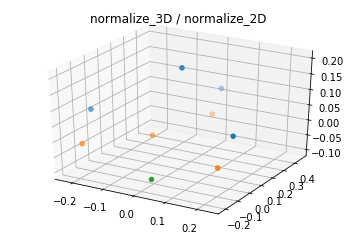

In [22]:
#------------------------------test---------------------------------
Delta=np.zeros((4,2))
normalize_3D_xyz_opt=ball_delta_to_xyz(normalize_3D_ball,ball_center,Delta)
print('normalize_3D=\n',normalize_3D)
print('normalize_3D_ball=\n',normalize_3D_ball)
print('\nnormalize_3D_xyz_opt=\n',normalize_3D_xyz_opt)
#------------------------------test---------------------------------
bx = plt.subplot(111, projection='3d')
bx.scatter(normalize_3D_xyz_opt.T[0],normalize_3D_xyz_opt.T[1],normalize_3D_xyz_opt.T[2])
bx.scatter(normalize_2D.T[0],normalize_2D.T[1])
plt.title('normalize_3D / normalize_2D')
bx.scatter(ball_center[0],ball_center[1],ball_center[2])
plt.show()

normalize_3D=
 [[-0.22487876 -0.16740975 -0.03373181]
 [ 0.22487876 -0.16740975 -0.03373181]
 [ 0.          0.00249865  0.10119544]
 [ 0.          0.33232084 -0.03373181]]
normalize_3D_ball=
 [[ 0.23805805  3.32626076  1.29051481]
 [ 0.23805805 -0.18466811  1.29051481]
 [ 0.23805805  1.57079633  0.56719898]
 [ 0.46243696  1.57079633  1.4279061 ]]

normalize_3D_xyz_opt=
 [[ -2.24878763e-01  -4.20065310e-02   6.58530913e-02]
 [  2.24878763e-01  -4.20065310e-02   6.58530913e-02]
 [  7.83173063e-18   1.27901867e-01   2.00780349e-01]
 [  2.80275148e-17   4.57724053e-01   6.58530913e-02]]


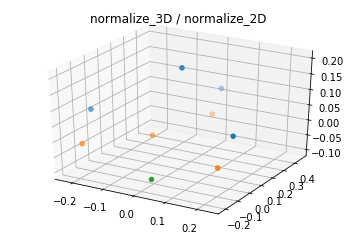

In [23]:
#------------------------------test---------------------------------
Delta=np.zeros((4,2))
normalize_3D_xyz_opt=ball_delta_to_xyz(normalize_3D_ball,ball_center,Delta)
print('normalize_3D=\n',normalize_3D)
print('normalize_3D_ball=\n',normalize_3D_ball)
print('\nnormalize_3D_xyz_opt=\n',normalize_3D_xyz_opt)
#------------------------------test---------------------------------
bx = plt.subplot(111, projection='3d')
bx.scatter(normalize_3D_xyz_opt.T[0],normalize_3D_xyz_opt.T[1],normalize_3D_xyz_opt.T[2])
bx.scatter(normalize_2D.T[0],normalize_2D.T[1])
plt.title('normalize_3D / normalize_2D')
bx.scatter(ball_center[0],ball_center[1],ball_center[2])
plt.show()

In [24]:
#转换Delta，将送入优化器的（12，）转换成（3，4）
def get_Delta_convert(Delta):
    return np.array([Delta[0:4],Delta[4:8]]).T

In [25]:
np.sum(normalize_3D_xyz_opt-normalize_3D)

0.89995248102501102

In [26]:
normalize_3D_xyz_opt

array([[ -2.24878763e-01,  -4.20065310e-02,   6.58530913e-02],
       [  2.24878763e-01,  -4.20065310e-02,   6.58530913e-02],
       [  7.83173063e-18,   1.27901867e-01,   2.00780349e-01],
       [  2.80275148e-17,   4.57724053e-01,   6.58530913e-02]])

In [27]:
# 定义送入优化器的修正的目标函数
def f(Delta):
    a=1
    Delta=get_Delta_convert(Delta)
    normalize_3D_xyz_delta=ball_delta_to_xyz(normalize_3D_ball,ball_center,Delta)
    disparity = (normalize_2D - np.dot(normalize_3D_xyz_delta, P.T)).T  # disparity:d=b-P*a
    objective = np.sum(disparity ** 2)  # 目标函数
    penalty =np.sum((normalize_3D_xyz_delta-normalize_3D)**2)# 惩罚函数
    revised_objective =  objective + a *penalty  # 修正的目标函数
    return revised_objective

In [28]:
#-----------------test-main---------------------------------------------
label=[-3.64614,-17.1319,-2.81734]
label_02=[-10.3737,-7.72744,2.86461]
label_20=[-11.1298,14.6895,-3.71618]
img_with_line, img_with_line_opt=HeadPose(img)
plt.subplot(1,2,1)
plt.imshow(img_with_line)
plt.subplot(1,2,2)
plt.imshow(img_with_line_opt)
plt.show()

NameError: name 'HeadPose' is not defined

In [29]:
#------------------------------test---------------------------------
#K=np.random.random(normalize_3D.shape[0])
Delta=np.ones((4,2))#初始化
Delta_opt=scipy.optimize.fmin_cg(f, Delta,gtol=1e-10)#共轭梯度下降法
Delta_opt=get_Delta_convert(Delta_opt)
#K_opt=scipy.optimize.leastsq(f, K,gtol=1e-5)#Levenberg–Marquardt算法
print('Delta_opt=\n',Delta_opt)

         Current function value: 0.056444
         Iterations: 118
         Function evaluations: 3602
         Gradient evaluations: 359
Delta_opt=
 [[ 0.55027792  0.2802815 ]
 [-0.45084422  0.28028149]
 [ 1.30998293 -0.67601382]
 [-0.07714318  0.93703589]]


[[-0.1766074  -0.15962914  0.06585309]
 [ 0.19158143 -0.14130885  0.06585309]
 [ 0.02497882 -0.00666666  0.20078035]
 [ 0.02497882  0.32315552  0.06585309]]
[[-0.18337078 -0.20931947]
 [ 0.23180834 -0.18164086]
 [-0.05189739  0.01902904]
 [ 0.00345983  0.37193129]]


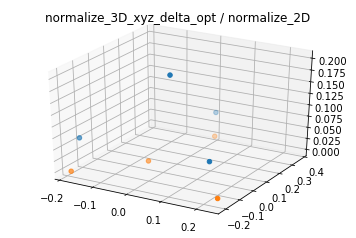

In [30]:
#------------------------------test---------------------------------
normalize_3D_xyz_delta_opt=ball_delta_to_xyz(normalize_3D_ball,ball_center,Delta_opt)

print(normalize_3D_xyz_delta_opt)
print(normalize_2D)
cx = plt.subplot(111, projection='3d')
cx.scatter(normalize_3D_xyz_delta_opt.T[0],normalize_3D_xyz_delta_opt.T[1],normalize_3D_xyz_delta_opt.T[2])
cx.scatter(normalize_2D.T[0],normalize_2D.T[1])
plt.title('normalize_3D_xyz_delta_opt / normalize_2D')
plt.show()

## 6.计算Delta修正后的最优投影矩阵

In [31]:
# 得到Delta修正后的最优投影矩阵
def get_P_Delta_opt(normalize_2D, normalize_3D_xyz_delta_opt):
    '''
    计算K修正后的最优投影矩阵
    :param normalize_2D: 归一化2D特征点
    :param normalize_3D_K: 归一化K修正3D模型
    :return:最优投影矩阵
    '''
    P_Delta_opt = np.dot(np.dot(normalize_2D.T, normalize_3D_xyz_delta_opt), np.linalg.pinv(np.dot(normalize_3D_xyz_delta_opt.T, normalize_3D_xyz_delta_opt)))
    return P_Delta_opt

In [32]:
P_Delta_opt=get_P_Delta_opt(normalize_2D, normalize_3D_xyz_delta_opt)
P_Delta_opt

array([[ 1.13637058, -0.08164413, -0.29408156],
       [ 0.01190192,  1.1941609 ,  0.04365481]])

In [33]:
# 由最优投影矩阵计算欧拉角
def get_euler_angle(P_Delta_opt):
    '''
    由最优投影矩阵计算欧拉角
    :param P_Delta_opt: 最优投影矩阵
    :return: 欧拉角
    '''
    pose = np.array([0.0, 0.0, 0.0])  # (theta x,y,z)
    r1 = P_Delta_opt[0]
    r2 = P_Delta_opt[1]
    r3 = np.cross(r1, r2)
    #print('r3=', r3)
    pose[0] = -math.atan(r3[1] / r3[2]) / math.pi * 180.0#论文和data的参考系不一致，前面加负号和data一致
    pose[1] = -math.atan(r3[0] / (r3[1] ** 2 + r3[2] ** 2) ** 0.5) / math.pi * 180.0
    pose[2] = -math.atan(r2[0] / r1[0]) / math.pi * 180.0 #论文和data的参考系不一致，前面加负号和data一致
    return pose

In [34]:
#------------------------------test---------------------------------
pose=get_euler_angle(P_Delta_opt)
print('pose=',pose)

pose= [  2.23959299 -14.34776827  -0.60007284]


In [35]:
# 画表示姿势的线
def draw_line(img, points_2D,P_Delta_opt):
    '''
    画表示姿势的线
    :param img: 输入图片
    :param points_2D: dlib提取的2D特征点
    :return: 画有姿势线的图片
    '''
    nose_tip_2D = (int(points_2D[2][0]), int(points_2D[2][1]))
    far_3D = np.array([0.0, 0.0, 1000.0])
    far_2D = np.dot(np.dot(P_Delta_opt, (far_3D - center_3D) / L_3D), L_2D) + center_2D
    p1 = (int(nose_tip_2D[0]), int(nose_tip_2D[1]))
    p2 = (int(far_2D[0]), int(far_2D[1]))
    #print('p1=', p1, 'p2=', p2)
    img_with_line = np.copy(img)
    cv2.line(img_with_line, p1, p2, (255, 0, 0), 2)
    return img_with_line

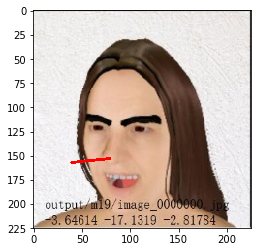

In [36]:
#-----------------test----------------------------------------------
img_with_line=draw_line(img,points_2D,P_Delta_opt)
plt.imshow(img_with_line)
plt.show()

## 主函数

In [37]:
def get_loss(pose,label):
    return np.sum(np.abs(pose-label))

In [41]:
pose=np.array([-12,-14,5])
label=[-10.3737,-7.72744,2.86461]
get_loss(pose,label)

10.03425

In [38]:
def HeadPose(img):
    points_2D=get_points_2D(img)
    points_3D=model_3D()
    
    normalize_3D,center_3D, L_3D=get_normalize(points_3D)
    normalize_2D,center_2D, L_2D=get_normalize(points_2D)
    
    P=get_P_matrix(normalize_3D,normalize_2D)
    pose=get_euler_angle(P)
    img_with_line=draw_line(img,points_2D,P)
    
    ball_center=get_ball_center(normalize_3D)
    normalize_3D_ball=xyz_to_ball(normalize_3D)
    
    Delta=np.zeros((4,2))#初始化
    Delta_opt=scipy.optimize.fmin_cg(f, Delta,gtol=1e-10)#共轭梯度下降法
    Delta_opt=get_Delta_convert(Delta_opt)
    
    normalize_3D_xyz_delta_opt=ball_delta_to_xyz(normalize_3D_ball,ball_center,Delta_opt)
    
    P_Delta_opt=get_P_Delta_opt(normalize_2D, normalize_3D_xyz_delta_opt)
    
    pose_opt=get_euler_angle(P_Delta_opt)
    img_with_line_opt=draw_line(img,points_2D,P_Delta_opt)
    
    #print('normalize_2D=\n',normalize_2D)
    #print('\nnormalize_3D=\n',normalize_3D)
    #print("\nP=",P)
    #print('\nDelta_opt=',Delta_opt)
    #print('\nnormalize_3D_xyz_delta_opt=\n',normalize_3D_xyz_delta_opt)
    #print('\nP_Delta_opt=\n',P_Delta_opt)
    print('Delta_opt=',Delta_opt)
    print('\nlabel=',label)
    print('\npose=',pose)
    print('loss=',get_loss(pose,label))
    print('\npose_opt=',pose_opt)
    print('loss=',get_loss(pose_opt,label))
    
    return img_with_line,img_with_line_opt

         Current function value: 0.056444
         Iterations: 97
         Function evaluations: 2471
         Gradient evaluations: 247
Delta_opt= [[ 0.55027792  0.2802815 ]
 [-0.45084422  0.2802815 ]
 [ 1.30998261 -0.67601382]
 [-0.07714318 -0.65125546]]

label= [-3.64614, -17.1319, -2.81734]

pose= [  9.67903792 -28.32405297  -3.81407483]
loss= 25.514065727

pose_opt= [  2.23959501 -14.34776757  -0.60007271]
loss= 10.8871347387


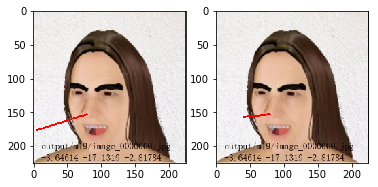

In [39]:
#-----------------test----------------------------------------------
label=[-3.64614,-17.1319,-2.81734]
label_02=[-10.3737,-7.72744,2.86461]
label_20=[-11.1298,14.6895,-3.71618]
img_with_line, img_with_line_opt=HeadPose(img)
plt.subplot(1,2,1)
plt.imshow(img_with_line)
plt.subplot(1,2,2)
plt.imshow(img_with_line_opt)
plt.show()

         Current function value: 0.056444
         Iterations: 97
         Function evaluations: 2471
         Gradient evaluations: 247
Delta_opt= [[ 0.55027792  0.2802815 ]
 [-0.45084422  0.2802815 ]
 [ 1.30998261 -0.67601382]
 [-0.07714318 -0.65125546]]

label= [-3.64614, -17.1319, -2.81734]

pose= [  9.67903792 -28.32405297  -3.81407483]
loss= 25.514065727

pose_opt= [  2.23959501 -14.34776757  -0.60007271]
loss= 10.8871347387


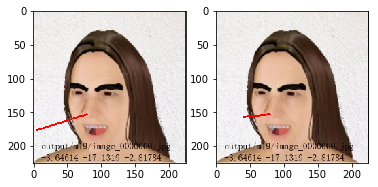

In [40]:
#-----------------test----------------------------------------------
label=[-3.64614,-17.1319,-2.81734]
label_02=[-10.3737,-7.72744,2.86461]
label_20=[-11.1298,14.6895,-3.71618]
img_with_line, img_with_line_opt=HeadPose(img)
plt.subplot(1,2,1)
plt.imshow(img_with_line)
plt.subplot(1,2,2)
plt.imshow(img_with_line_opt)
plt.show()